In [17]:
from radiomics import featureextractor
import pydicom
from pydicom.filereader import read_dicomdir
from pydicom.data import get_testdata_files
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manim
from skimage.measure import find_contours
from pylidc.utils import consensus
import math
from PIL import Image
import os

Por o path onde temos as imagens dicom 

In [18]:
path = "C:/Users/35192/Desktop/LIDC-IDRI"
f = open('C:/Users/35192/pylidc.conf', 'w')
f.write(f'[dicom]\npath = {path}\n\n')
f.close()

Decidimos utilizar os dados num formato 2D dado que nos é mais acessivel.

Neste codigo seguinte,para cada cluster de anotacoes criamos um consensus entre as delimitacoes dos nodulos,para ter uma melhor nocao da forma mais provavel do nodulo.

Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This ma

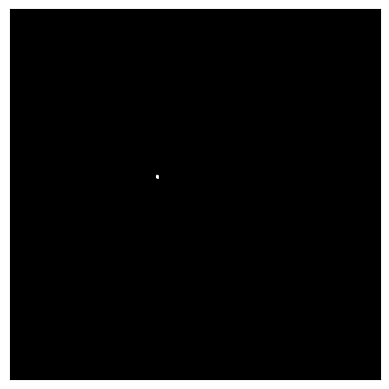

In [19]:
# Query for a scan, and convert it to an array volume.
import os
root="C:/Users/35192/Desktop/LIDC-IDRI"
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
for di in dirlist:
    sca = pl.query(pl.Scan).filter(pl.Scan.patient_id == di).all()
    count=0
    for scan in sca:
        vol = scan.to_volume()
        nods = scan.cluster_annotations()
        for n in range(len(nods)):
            anns = nods[n]
            cmask,cbbox,masks = consensus(anns, clevel=0.5,pad=[(512,512), (512,512), (0,0)])
            k = int(0.5*(cbbox[2].stop - cbbox[2].start))
            number_image = np.array(vol[cbbox][:,:,k])
            
            #guardamos o slice dicom onde fazemos a dilimitacao do nodulo
            fig=plt.imshow(number_image,cmap=plt.cm.gray)
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            plt.savefig(f'C:/Users/35192/Desktop/dicom-png/{di}-{count}.png',bbox_inches="tight",pad_inches=0.0)
            
            
            #guardamos a dilimitacao do nodulo na imagem original,so que tudo oque nao faz parte da delemitacao fica preto
            fig=plt.imshow(cmask[:,:,k],cmap=plt.cm.gray)
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            plt.savefig(f'C:/Users/35192/Desktop/imagens/{di}-{count}.png',bbox_inches="tight",pad_inches=0.0)
            count+=1
    
